# Data Analysis on Financial Research Reports
An equity research report is a document prepared by an analyst that provides a recomendation on whether investors should buy, hold or sell shares of a public company. Additionally, it provides an overview of the business, the industry it operates in, the management team, its financial performance, risks, and the target price.

A good equity research report could provide investors comprehensive analysis on the target equity, and a precise recomendation as well. Most investors expect the analysts make precise predictions. Therefore, it is of great significance to see through the analysts and their research reports to get a complete vision of all the researches, get the information such as the analysts who make the best and the worst predictions, the overall successful rate and the equity on which most analysts concentrate, which could be helpful for investors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
import random
import re

# 1  Get the raw data
By using web crawler, we can get the information of equity research reports from **hexun.com**, including the title, authors and their company, uploaded date and investment attitude.

In [1]:
def random_header():
    headerpool = [
            "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36",
            "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.153 Safari/537.36",
            "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:30.0) Gecko/20100101 Firefox/30.0",
            "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/537.75.14",
            "Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.2; Win64; x64; Trident/6.0)",
            'Mozilla/5.0 (Windows; U; Windows NT 5.1; it; rv:1.8.1.11) Gecko/20071127 Firefox/2.0.0.11',
            'Opera/9.25 (Windows NT 5.1; U; en)',
            'Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; .NET CLR 1.1.4322; .NET CLR 2.0.50727)',
            'Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.5 (like Gecko) (Kubuntu)',
            'Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.8.0.12) Gecko/20070731 Ubuntu/dapper-security Firefox/1.5.0.12',
            'Lynx/2.8.5rel.1 libwww-FM/2.14 SSL-MM/1.4.1 GNUTLS/1.2.9',
            "Mozilla/5.0 (X11; Linux i686) AppleWebKit/535.7 (KHTML, like Gecko) Ubuntu/11.04 Chromium/16.0.912.77 Chrome/16.0.912.77 Safari/535.7",
            "Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:10.0) Gecko/20100101 Firefox/10.0 "
            ]
    
    header = {'User-Agent':random.choice(headerpool)}
    return header

def progressbar(i,num):
    pct = (i+1)/num*100
    comp = '#'*int(pct/2)
    incomp = '-'*int((100-pct)/2)
    form = '\r %d/%d | [%s%s] | %.2f%% ' % (i+1,num,comp,incomp,pct)
    
    print(form,end='')
    if i == num-1:
        print('\n')


df = pd.DataFrame(columns=range(5))

session = requests.session()
session.get("http://www.hexun.com/")
num = 5640
for i in range(num):
    progressbar(i,num)
    time.sleep(0.5)
    session.headers = random_header()
    content = session.get("http://yanbao.stock.hexun.com/listnews1_"+str(i+1)+".shtml")
    string = content.text

    chg = re.sub("</a>","",string)
    chg = re.sub("</td>","@",chg)
    chg = re.sub("<td align.*?>","",chg)
    chg = re.sub(' class="fxx_wb">',">!",chg)
    chg = re.sub('<a href.*?blank">',"",chg)
    pat = '!(.*?)@(.*?)@(.*?)@(.*?)@(.*?)@'
    df_0 = pd.DataFrame(re.compile(pat).findall(chg))

    df = df.append(df_0,ignore_index=True)

    if (i+1)%500 == 0:
        df.to_csv("./hexundata/data_1_"+str(int((i+1)/500))+".csv")
        df = pd.DataFrame(columns=range(5))
    elif i+1 == num:
        df.to_csv("./hexundata/data_1_"+str(int((i+1)/500)+1)+".csv")

In [3]:
df = pd.DataFrame(columns=range(5))

session = requests.session()
session.get("http://www.hexun.com/")
num = 4280
for i in range(num):
    progressbar(i,num)
    time.sleep(0.5)
    session.headers = random_header()
    content = session.get("http://yanbao.stock.hexun.com/listnews2_"+str(i+1)+".shtml")
    string = content.text

    chg = re.sub("</a>","",string)
    chg = re.sub("</td>","@",chg)
    chg = re.sub("<td align.*?>","",chg)
    chg = re.sub(' class="fxx_wb">',">!",chg)
    chg = re.sub('<a href.*?blank">',"",chg)
    pat = '!(.*?)@(.*?)@(.*?)@(.*?)@(.*?)@'
    df_0 = pd.DataFrame(re.compile(pat).findall(chg))

    df = df.append(df_0,ignore_index=True)

    if (i+1)%500 == 0:
        df.to_csv("./hexundata/data_2_"+str(int((i+1)/500))+".csv")
        df = pd.DataFrame(columns=range(5))
    elif i+1 == num:
        df.to_csv("./hexundata/data_2_"+str(int((i+1)/500)+1)+".csv")

 4280/4280 | [##################################################] | 100.00% 



# 2  Visualizations

## 2.0  Preprocesses

In [77]:
def pre_process_company():
    df = pd.DataFrame()
    for i in range(11):
        df = df.append(pd.read_csv("./hexundata/data_1_"+str(i+1)+".csv",
                                   header=0,index_col=0),ignore_index=True)

    df.iloc[73502,0] += df.iloc[73502,1]
    df.iloc[73502,1:4] = df.iloc[73502,2:5].values
    df.iloc[73502,4] = df.iloc[73503,4]

    temp = pd.DataFrame(df.iloc[:,0].str.split("：").to_list())
    temp.iloc[164598,1] += "："+temp.iloc[164598,2]
    temp.drop(labels=2,axis=1,inplace=True)
    temp.iloc[:,1] = temp.iloc[:,1].replace(" .*","",regex=True)

    df.insert(0,"company",temp.iloc[:,0])
    df.insert(1,"title",temp.iloc[:,1])
    df.drop(labels="0",axis=1,inplace=True)

    date = pd.to_datetime(df.iloc[:,5])
    df["year"] = date.apply(lambda x: x.strftime("%Y"))
    df["month"] = date.apply(lambda x: x.strftime("%m"))
    df["day"] = date.apply(lambda x: x.strftime("%d"))
    df.drop(labels="4",axis=1,inplace=True)

    df = df.rename(columns={"1":"org","2":"author","3":"opinion"})

    df.to_csv("./hexundata/company_info.csv")
    
pre_process_company()

In [6]:
def pre_process_industry():
    df = pd.DataFrame()
    for i in range(9):
        df = df.append(pd.read_csv("./hexundata/data_2_"+str(i+1)+".csv",
                                   header=0,index_col=0),ignore_index=True)

    df.drop(labels=[133897,169844],axis=0,inplace=True)

    temp = pd.DataFrame(df.iloc[:,0].str.split("：").to_list())
    df.insert(0,"industry",temp.iloc[:,0])
    df.insert(1,"title",temp.iloc[:,1])
    df.drop(labels="0",axis=1,inplace=True)

    date = pd.to_datetime(df.iloc[:,5])
    df["year"] = date.apply(lambda x: x.strftime("%Y"))
    df["month"] = date.apply(lambda x: x.strftime("%m"))
    df["day"] = date.apply(lambda x: x.strftime("%d"))
    df.drop(labels="4",axis=1,inplace=True)

    df = df.rename(columns={"1":"org","2":"author","3":"opinion"})

    df.to_csv("./hexundata/industry_info.csv")

pre_process_industry()

## 2.1  Read the data files
After some preprocesses, we get the basic information of equity and industry research reports, respectively, including the company/industry category, report title, organization, author, opinion and date. I will be using the data from 2010 to 2019 for these two datasets.

In [ ]:
cl = (pd.read_excel("Color.xlsx",header=0,index_col=0)/255).values
plt.style.use("seaborn-white")

In [3]:
df_e = pd.read_csv("./hexundata/company_info.csv",header=0,index_col=0)
df_e.head()

,company,title,org,author,opinion,year,month,day
0,三全食品,基本面改善逻辑确认,广发证券,王永锋,买入,2019,12,19
1,双汇发展,高温肉制品周转速度加快,申万宏源,吕昌,买入,2019,11,6
2,尚品宅配,整装先驱者,申万宏源,屠亦婷,增持,2019,11,5
3,圣邦股份,大客户提供最大增量,申万宏源,梁爽,增持,2019,11,5
4,分众传媒,楼宇媒体龙头价值依旧,申万宏源,林起贤,买入,2019,11,5


In [4]:
df_i = pd.read_csv("./hexundata/industry_info.csv",header=0,index_col=0)
df_i.head()

,industry,title,org,author,opinion,year,month,day
0,金融,寻找穿越周期的优秀银行 荐10股,申万宏源,马鲲鹏,无,2019,12,30
1,机械制造,11月挖掘机销量超预期 工业机器人景气度持续改善,银河证券,刘兰程,推荐,2019,12,30
2,金融,中外对比角度看我国银行业转型路径 荐7股,银河证券,武平平,推荐,2019,12,30
3,公用事业,全国市场化改革有望温和推进 荐5股,银河证券,周然,谨慎推荐,2019,12,30
4,商业零售,库存继续去化和需求韧性支撑钢价 荐3股,银河证券,华立,推荐,2019,12,30


In [5]:
df_list = [df_e,df_i]

##  2.2  Limitations of the dataset
Some securites are not included such as "中金公司", "中信证券" and "国泰君安", which makes some of analyzing result less persuasive, especially in the field of the ranking of the securities and authors.

In [164]:
pd.DataFrame(re.compile("(中.*?)'").findall(str(df_e["org"].value_counts().index.to_list())))

,0
0,中信建投
1,中银国际
2,中投证券
3,中泰证券
4,中原证券
5,中航证券
6,中邮证券
7,中信金通
8,中山证券
9,中信证券国际


In [165]:
pd.DataFrame(re.compile("(国.*?)'").findall(str(df_e["org"].value_counts().index.to_list())))

,0
0,国际
1,国信证券
2,国金证券
3,国海证券
4,国联证券
5,国都证券
6,国元证券
7,国盛证券
8,国际
9,国际


## 2.3  Numbers of research reports published per year

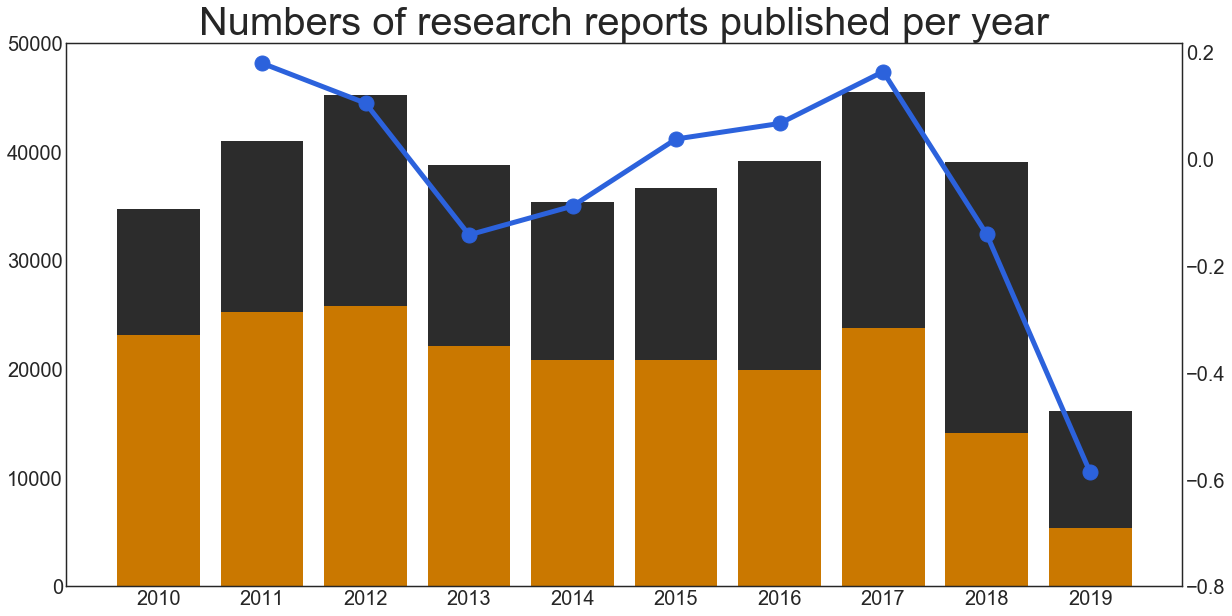

In [64]:
def plot_ts_year(df_list,cl):
    plt.rcParams["font.sans-serif"] = "Arial"
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot()
    a = 0
    for i in range(2):
        temp = df_list[i]["year"].value_counts()
        temp = temp.reindex(range(2010,2020))
        ax.bar(range(temp.shape[0]),temp,color=cl[i],bottom=a)
        if i == 0:
            a = temp.copy()

    ax.tick_params(labelsize=20)
    ax.set_xticks(range(temp.shape[0]))
    ax.set_xticklabels(range(2010,2020))
    ax.set_yticks(np.linspace(0,50000,6))


    ax = ax.twinx()
    ax.plot(range(1,temp.shape[0]),(a+temp).diff()[1:]/(a+temp)[:-1].values,
            color=cl[2],linewidth=5)
    ax.plot(range(1,temp.shape[0]),(a+temp).diff()[1:]/(a+temp)[:-1].values,
            color=cl[2],marker=".",markersize=30)
    ax.tick_params(labelsize=20)
    ax.set_yticks(np.linspace(-0.8,0.2,6))

    plt.title("Numbers of research reports published per year",fontsize=40)
    plt.show()

plot_ts_year(df_list,cl)

## 2.4  Numbers of research reports published per month

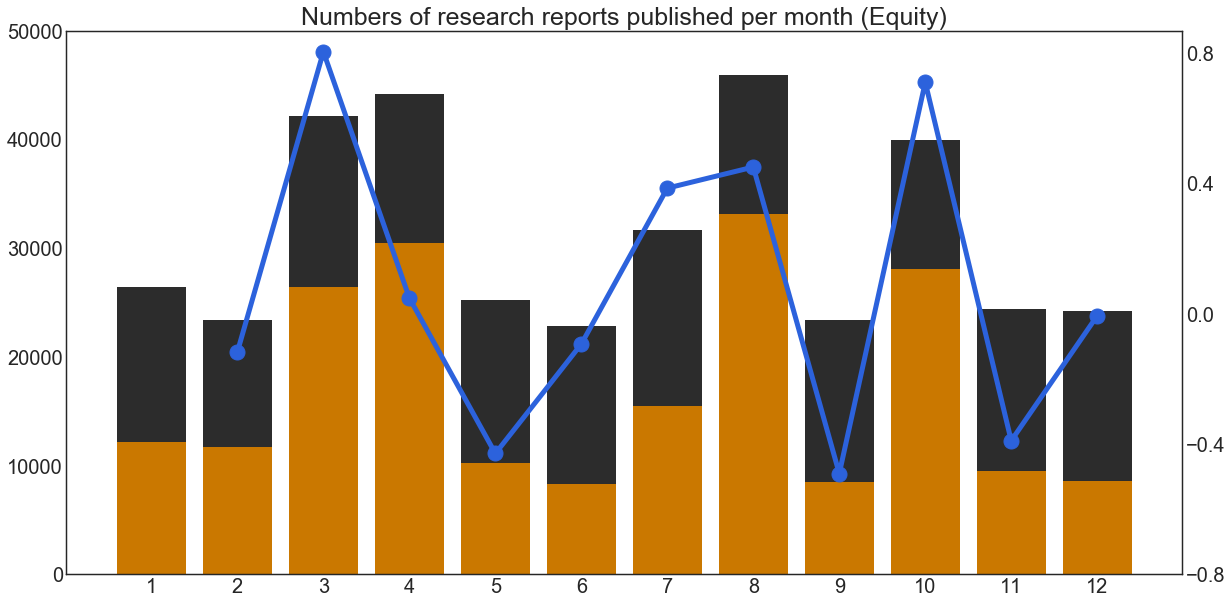

In [66]:
def plot_ts_month(df_list,cl):
    plt.rcParams["font.sans-serif"] = "Arial"
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot()

    a = 0
    for i in range(2):
        temp = df_list[i]["month"].value_counts()
        temp = temp.reindex(range(1,13))
        ax.bar(range(temp.shape[0]),temp,color=cl[i],bottom=a)
        if i == 0:
            a = temp.copy()

    ax.set_xticks(range(temp.shape[0]))
    ax.set_yticks(np.linspace(0,50000,6))
    ax.set_ylim([0,50000])
    ax.tick_params(labelsize=20)
    ax.set_xticklabels(range(1,13))

    ax = ax.twinx()
    ax.plot(range(1,temp.shape[0]),(a+temp).diff()[1:]/(a+temp)[:-1].values,
            color=cl[2],linewidth=5)
    ax.plot(range(1,temp.shape[0]),(a+temp).diff()[1:]/(a+temp)[:-1].values,
            color=cl[2],marker=".",markersize=30)
    ax.tick_params(labelsize=20)
    ax.set_yticks(np.linspace(-0.8,0.8,5))

    plt.title("Numbers of research reports published per month (Equity)",fontsize=25)
    plt.show()
    
plot_ts_month(df_list,cl)

## 2.5  Most preferenced opinions

#### Equity research reports

In [68]:
temp = df_e["opinion"].value_counts()
pd.DataFrame(temp)

,opinion
买入,76926
推荐,37276
增持,36270
强烈推荐,15906
无,12829
谨慎推荐,8394
中性,8109
持有,1693
谨慎增持,1520
--,1440


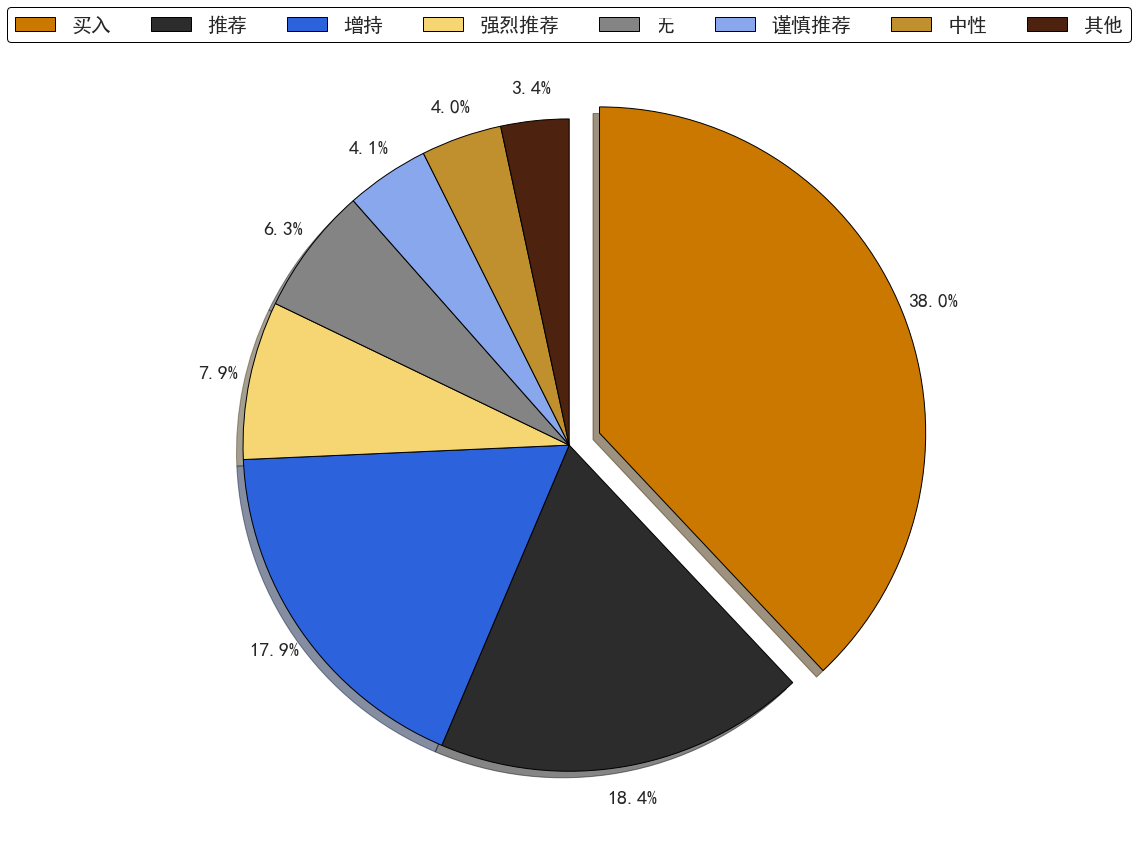

In [76]:
def plot_pie_chart(df,cl):
    temp = df["opinion"].value_counts().iloc[:7]
    temp["其他"] = df.shape[0]-temp.sum()

    plt.rcParams["font.sans-serif"] = "SimHei"
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot()
    pic,labeltxt,pcttxt = ax.pie(x=temp,explode=[0.1,0,0,0,0,0,0,0],colors=cl,
                                startangle=90,counterclock=False,shadow=True,
                                autopct="%3.1f%%",pctdistance=1.1,
                                wedgeprops={"linewidth":1,"linestyle":"-","edgecolor":"k"})
    for t in pcttxt:
        t.set_size(20)

    plt.legend(temp.index,loc="upper center",bbox_to_anchor=(0.5,1.05),ncol=8,
               fontsize=20,frameon=True,framealpha=1,edgecolor="k")
    plt.show()

plot_pie_chart(df_list[0],cl)

#### Industry research reports

In [69]:
temp = df_i["opinion"].value_counts()
pd.DataFrame(temp)

,opinion
无,35160
看好,26786
增持,26526
中性,21334
推荐,16856
买入,12511
强于大市,6297
领先大市,4908
谨慎推荐,4565
同步大市,3902


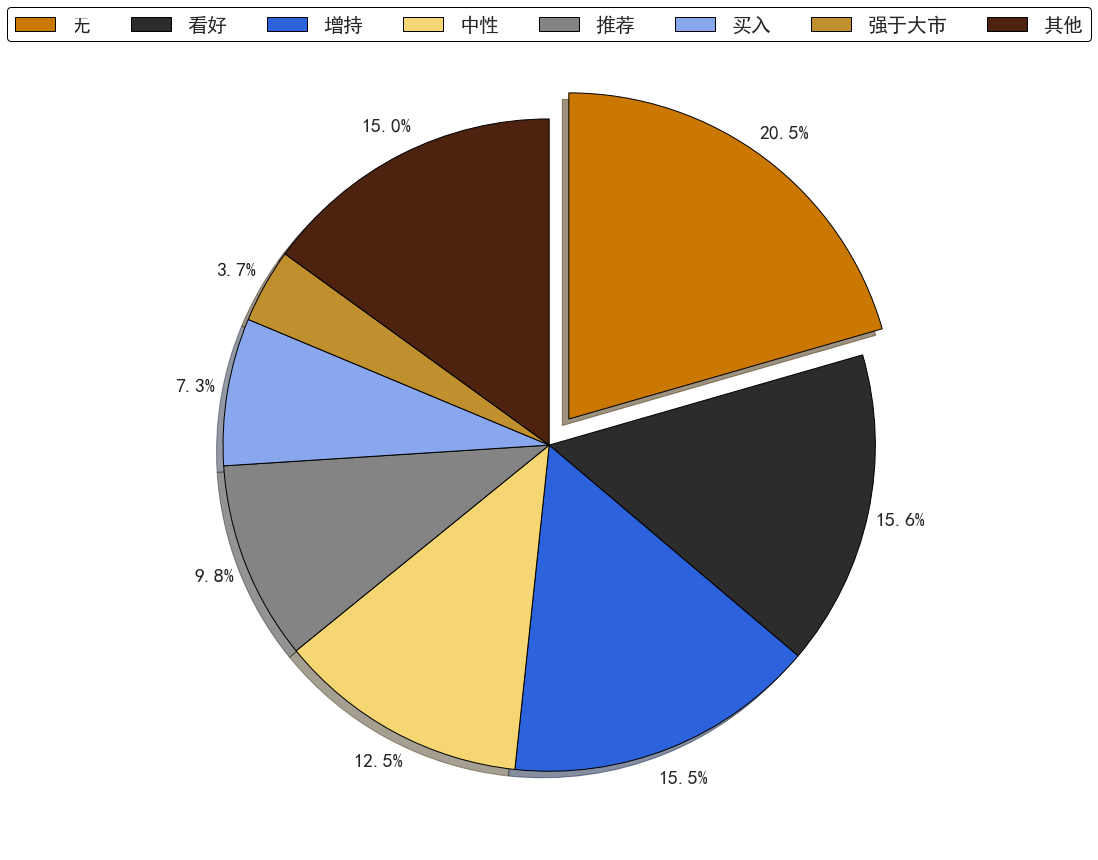

In [75]:
plot_pie_chart(df_list[1],cl)

## 2.6  Concentrations and distributions

In [89]:
pd.DataFrame(df_e["company"].value_counts(normalize=True))

,company
万科A,0.004113
贵州茅台,0.003471
保利地产,0.003135
五粮液,0.002923
伊利股份,0.002795
...,...
华仁药业:腹透市场渐露峥嵘,0.000005
凤凰传媒:立志综合传媒巨头 出版航母起锚扬帆,0.000005
精工钢构:精工钢构发行债券申请获证监会审核通过点评,0.000005
"回天胶业:""胶""龙岂是池中物 胶粘剂行业龙头",0.000005


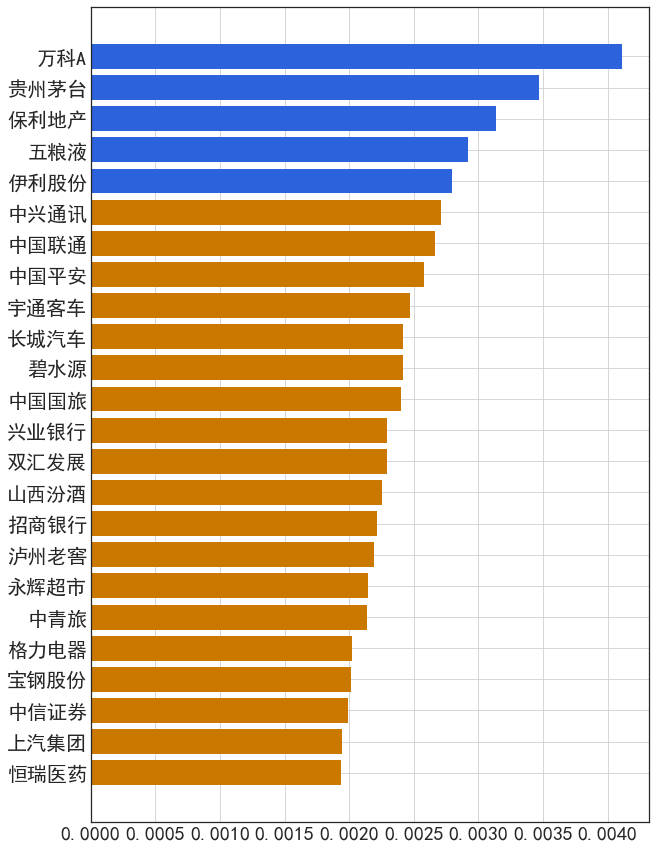

In [97]:
def plot_barh(df,cl,category,bins):
    temp = df[category].value_counts(normalize=True)[:bins].sort_values()
    fig = plt.figure(figsize=(10,15))
    ax = fig.add_subplot()
    ax.barh(temp.index[:-5],temp[:-5],color=cl[0])
    ax.barh(temp.index[-5:],temp[-5:],color=cl[2])
    ax.set_yticklabels(temp.index)
    ax.tick_params(labelsize=20)
    ax.grid()
    plt.show()
    
plot_barh(df_list[0],cl,"company",24)

In [77]:
pd.DataFrame(df_i["industry"].value_counts(normalize=True))

,industry
金融,0.082847
日常消费品,0.071714
信息科技,0.070236
地产,0.061924
化工,0.060434
...,...
地产月度数据点评:销售“假回暖”开工“真下滑”,0.000006
煤炭行业周报:煤炭资源税上调风险暂时解除,0.000006
吴立,0.000006
主要城市周交易报:成交量大幅下滑 集体降价大势所趋,0.000006


In [79]:
df_i["industry"].value_counts(normalize=True)[:24].sum()

0.9841525745494903

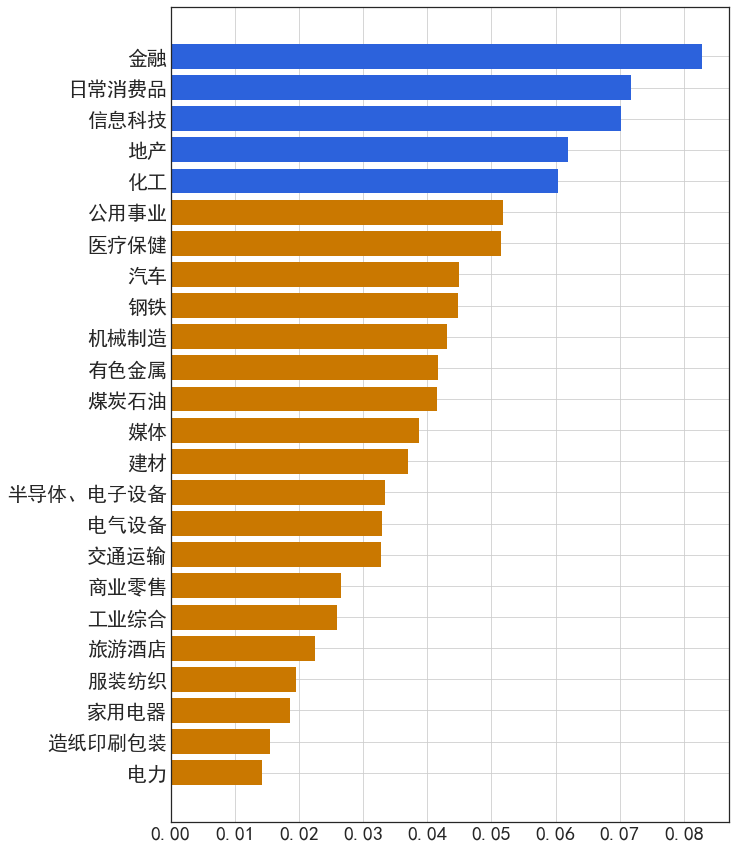

In [98]:
plot_barh(df_list[1],cl,"industry",24)

## 2.7  Rankings of securities on the amount of the reports

#### Equity research reports

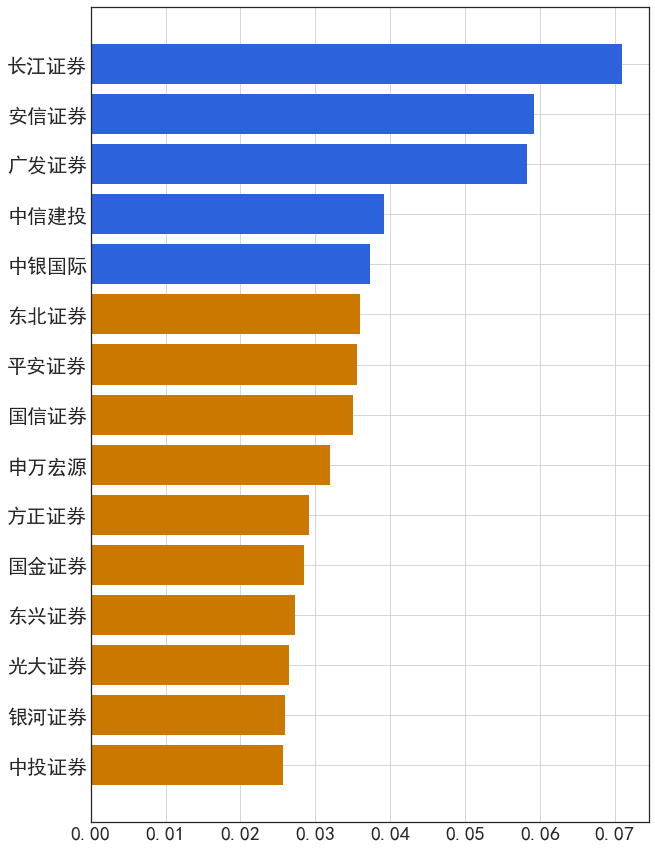

In [108]:
plot_barh(df_list[0],cl,"org",15)

In [131]:
rank_e = pd.DataFrame(index=range(10),columns=range(2010,2020))
for i in range(2010,2020):
    cond = df_e["year"] == i
    rank_e[i] = df_e[cond]["org"].value_counts().index[:10]
rank_e

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,长江证券,长江证券,长江证券,长江证券,长江证券,长江证券,长江证券,广发证券,申万宏源,申万宏源
1,国金证券,广发证券,安信证券,民生证券,广发证券,安信证券,广发证券,安信证券,广发证券,中信建投
2,国信证券,中银国际,国金证券,瑞银证券,安信证券,申万宏源,安信证券,申万宏源,方正证券,安信证券
3,湘财证券,光大证券,广发证券,广发证券,宏源证券,广发证券,申万宏源,中泰证券,安信证券,中泰证券
4,中银国际,东北证券,中银国际,宏源证券,瑞银证券,华泰证券,东北证券,东北证券,中泰证券,广发证券
5,天相投顾,联合证券,中投证券,中信建投,平安证券,中银国际,中信建投,方正证券,中信建投,方正证券
6,安信证券,安信证券,光大证券,安信证券,银河证券,平安证券,东吴证券,东吴证券,东吴证券,国盛证券
7,中投证券,中投证券,中信建投,光大证券,华泰证券,银河证券,西南证券,西南证券,国海证券,东吴证券
8,联合证券,国信证券,宏源证券,中银国际,国金证券,中信建投,平安证券,中信建投,西南证券,太平洋证券
9,国都证券,民生证券,平安证券,平安证券,国信证券,齐鲁证券,中泰证券,国信证券,东北证券,东北证券


In [163]:
def get_rank(rk,df):
    r_set = set()
    for i in range(2010,2020):
        r_set |= set(rk[i].to_list())

    schg = pd.DataFrame(index=r_set,columns=range(2010,2020))
    for i in range(2010,2020):
        cond = df["year"] == i
        temp = df[cond]["org"].value_counts().index.to_list()
        for idx in schg.index:
            try:
                schg.loc[idx,i] = temp.index(idx)+1
            except:
                schg.loc[idx,i] = np.nan
    schg.sort_values(by=2019,inplace=True)

    return schg

get_rank(rank_e,df_e)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
申万宏源,NaN,NaN,NaN,NaN,NaN,3,4,3,1,1
中信建投,14,14,8,6,11,9,6,9,6,2
安信证券,7,7,2,7,3,2,3,2,4,3
中泰证券,NaN,NaN,NaN,NaN,NaN,NaN,10,4,5,4
广发证券,11,2,4,4,2,4,2,1,2,5
方正证券,34,17,19,26,19,12,20,6,3,6
国盛证券,NaN,65,46,NaN,NaN,NaN,54,NaN,21,7
东吴证券,45,61,52,46,50,25,7,7,7,8
太平洋证券,52,55,48,48,44,36,22,15,14,9
东北证券,16,5,16,17,14,19,5,5,10,10


#### Industry research reports

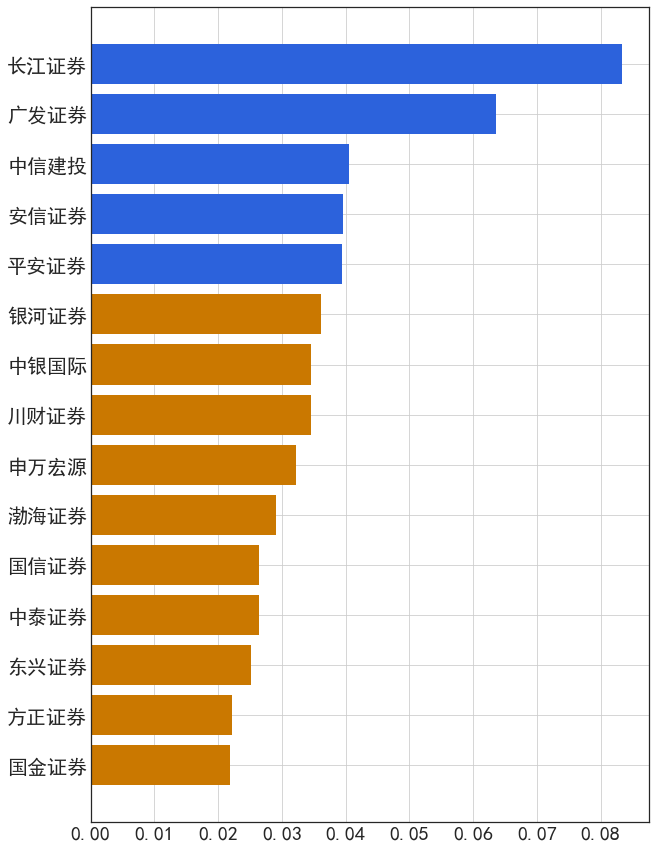

In [109]:
plot_barh(df_list[1],cl,"org",15)

In [157]:
rank_i = pd.DataFrame(index=range(10),columns=range(2010,2020))
for i in range(2010,2020):
    cond = df_i["year"] == i
    rank_i[i] = df_i[cond]["org"].value_counts().index[:10]

rank_i

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,长江证券,长江证券,广发证券,长江证券,长江证券,长江证券,长江证券,川财证券,川财证券,长江证券
1,国金证券,广发证券,长江证券,中信建投,广发证券,申万宏源,广发证券,广发证券,广发证券,中信建投
2,国信证券,光大证券,中信建投,广发证券,平安证券,广发证券,申万宏源,中泰证券,长江证券,川财证券
3,联合证券,联合证券,光大证券,银河证券,中信建投,安信证券,国金证券,申万宏源,申万宏源,申万宏源
4,大通证券,平安证券,银河证券,民生证券,安信证券,平安证券,平安证券,平安证券,中泰证券,广发证券
5,渤海证券,渤海证券,大通证券,平安证券,银河证券,银河证券,中银国际,安信证券,中信建投,中泰证券
6,光大证券,国金证券,安信证券,安信证券,齐鲁证券,中银国际,银河证券,方正证券,安信证券,中银国际
7,银河证券,银河证券,渤海证券,光大证券,中银国际,华泰证券,中泰证券,东兴证券,方正证券,长城证券
8,广发证券,中银国际,民生证券,中银国际,民生证券,华融证券,安信证券,国信证券,平安证券,平安证券
9,湘财证券,中投证券,国信证券,宏源证券,国金证券,中信建投,东兴证券,东吴证券,中银国际,国盛证券


In [158]:
get_rank(rank_i,df_i)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
长江证券,1,1,2,1,1,1,1,34,3,1
中信建投,25,15,3,2,4,10,12,13,6,2
川财证券,NaN,NaN,NaN,NaN,45,34,36,1,1,3
申万宏源,NaN,NaN,NaN,NaN,NaN,2,3,4,4,4
广发证券,9,2,1,3,2,3,2,2,2,5
中泰证券,NaN,NaN,NaN,NaN,NaN,NaN,8,3,5,6
中银国际,11,9,15,9,8,7,6,12,10,7
长城证券,18,19,21,15,25,24,23,18,19,8
平安证券,30,5,16,6,3,5,5,5,9,9
国盛证券,64,56,55,NaN,NaN,53,44,43,17,10
